In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Snippet for the use of relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Unsupervised Learning

## Dimensionality Reduction

In [33]:
from src.data.make_dataset import X, Y
from src.visualization.visualize import plot_MNIST_reconstruction, plot_samples, plot_variance_explained

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import numpy as np
import seaborn as sns


In [3]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_norm)

In [5]:
X_pca_proj = pca.inverse_transform(X_pca)

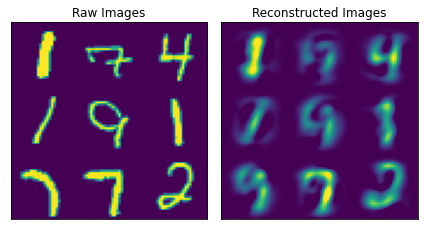

In [6]:
plot_MNIST_reconstruction(X_norm, X_pca_proj)

Ok that's cool, but how do we chose the number of components ?                            
First, we can try to plot the explained_variance_ratio for each component.                      
And then, we could keep just enough components to have, let's say, *90%* of our information.

In [15]:
pca2 = PCA()
pca2.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<AxesSubplot:ylabel='Density'>

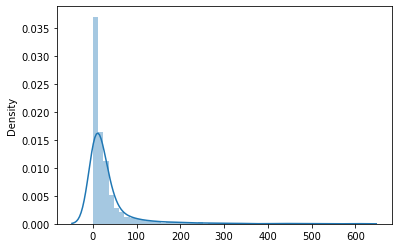

In [21]:
sns.distplot(pca2.singular_values_)

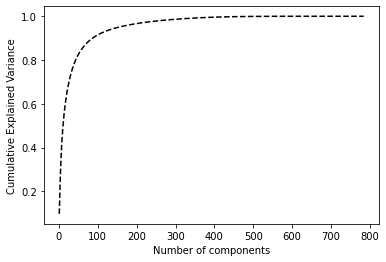

In [38]:

explained_variance_ratio_sum = np.cumsum(pca2.explained_variance_ratio_)

plot_variance_explained(explained_variance_ratio_sum)

In [37]:
variance_threshold = 0.9

np.argwhere(explained_variance_ratio_sum > variance_threshold)[0]

array([86], dtype=int64)

Only 86 components are required to keep 90% of the information and still drastically reducing the dimension of our data.
Finally, we can see it in action as we did before for 10 components

In [39]:
pca3 = PCA(n_components=0.9)
X_pca_opt = pca3.fit_transform(X_norm)

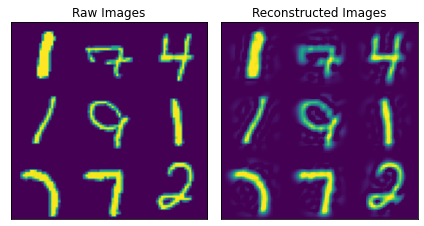

In [41]:
plot_MNIST_reconstruction(X_norm, pca3.inverse_transform(X_pca_opt))